In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [15]:
df['keyword'].value_counts()

,count
keyword,
wrecked,69
fatalities,45
deluge,42
armageddon,42
sinking,41
...,...
forest%20fire,19
epicentre,12
threat,11


In [17]:

df['keyword'].fillna('wrecked', inplace=True)

In [18]:
df.isnull().sum()

,0
id,0
keyword,0
location,2533
text,0
target,0


In [20]:
df=df.drop(['location'],axis=1)

In [21]:
df['target'].value_counts()

,count
target,
0,4342
1,3271


In [22]:
df['text'] = df['text'].str.lower()  # Küçük harfe çevir
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)  # Özel karakterleri kaldır
df['text'] = df['text'].str.replace('\n', '')  # Yeni satırları kaldır
df['text'] = df['text'].str.replace('\d+', '', regex=True)  # Sayıları kaldır
df['text'] = df['text'].str.replace('\'', '')  # Tek tırnakları kaldır
df['text'] = df['text'].str.replace('\r', '')  # Carriage return'u kaldır

In [23]:
df['text'][0]

'our deeds are the reason of this earthquake may allah forgive us all'

In [24]:
df['text'][333]

'sadly how windows  reveals microsofts ethics armageddon httptcostftjcrjea'

In [25]:
pip install wordcloud matplotlib

In [26]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from PIL import Image
import numpy as np

In [27]:
import matplotlib.pyplot as plt

In [28]:
def wc(data, bgcolor):
    plt.figure(figsize=(10, 10))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=None, contour_width=3, contour_color='white')
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [29]:
normal=df[df['target']==0]['text']
acil=df[df['target']==1]['text']

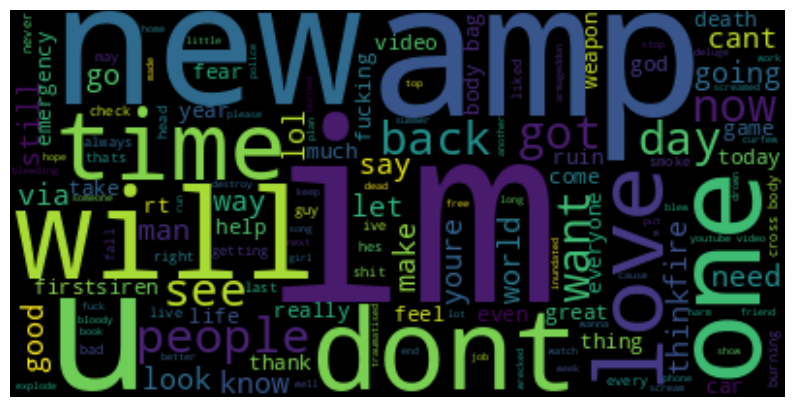

In [30]:
wc(normal,'black')

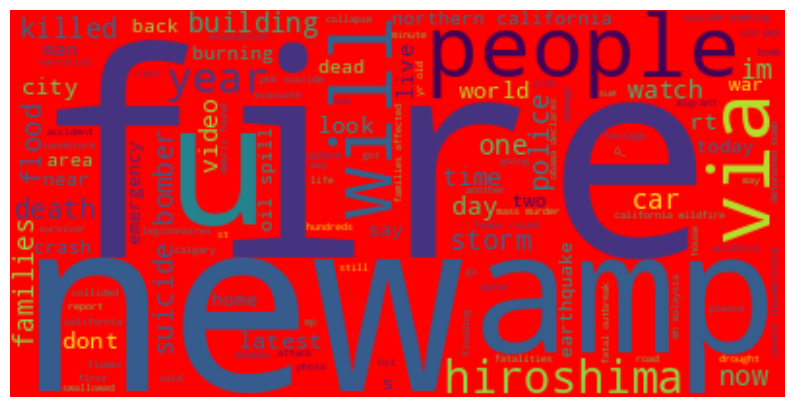

In [32]:
wc(acil,'red')

In [33]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
def lemmafn(text):

    words=TextBlob(text).words

    return[pr.stem(word) for word in words]

In [37]:
vect = CountVectorizer(ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [38]:
df.sample(1)

,id,keyword,text,target
545,794,avalanche,chevrolet avalanche lt lt used l v v auto...,1


In [60]:
x=df['text']
y=df['target']

In [61]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [62]:
x=vect.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:541: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


In [63]:
print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (7613, 10000)
y shape: (7613,)


In [64]:
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier",
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)

    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")

    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")

    return metrics.drop("Model", axis=1)

In [66]:
algo_test(x, y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[1181  137]
 [ 293  673]]
LogisticRegression()  modeli eğitiliyor!..
[[1152  166]
 [ 274  692]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[1038  280]
 [ 349  617]]
RandomForestClassifier()  modeli eğitiliyor!..
[[1212  106]
 [ 362  604]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[1174  144]
 [ 415  551]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[1259   59]
 [ 698  268]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[1186  132]
 [ 434  532]]
MultinomialNB()  modeli eğitiliyor!..
[[1143  175]
 [ 269  697]]
Eğitim tamamlandı.
En başarılı model:  BernoulliNB
Confusion Matrix:
[[1181  137]
 [ 293  673]]
classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1318
           1       0.83      0.70      0.76       966

    accuracy                           0.81      2284
   macro avg       0.82      0.80      0.80      2284
weighted a

,Accuracy,Precision,Recall,F1
BernoulliNB,0.811734,0.811734,0.811734,0.811734
LogisticRegression,0.807356,0.807356,0.807356,0.807356
MultinomialNB,0.805604,0.805604,0.805604,0.805604
RandomForestClassifier,0.795096,0.795096,0.795096,0.795096
GradientBoostingClassifier,0.755254,0.755254,0.755254,0.755254
AdaBoostClassifier,0.752189,0.752189,0.752189,0.752189
DecisionTreeClassifier,0.724606,0.724606,0.724606,0.724606
KNeighborsClassifier,0.668564,0.668564,0.668564,0.668564
